### Links
* https://medium.com/@jonathan_hui/gan-whats-generative-adversarial-networks-and-its-application-f39ed278ef09
* https://junyanz.github.io/CycleGAN/
* https://arxiv.org/pdf/1710.10196.pdf
* https://blog.paperspace.com/implementing-gans-in-tensorflow/
* https://github.com/YadiraF/GAN
* https://github.com/eriklindernoren/Keras-GAN

#### Extra links
* https://www.analyticsvidhya.com/blog/2017/06/introductory-generative-adversarial-networks-gans/
* https://skymind.ai/wiki/generative-adversarial-network-gan
* https://habr.com/post/352794/

## GAN - What is generative Adversary Networks GAN?

GAN is about creating, like drawnin a portrait or composing a symphony. This is hard compared to other deep learning fields. For instance, it is much easier to identify a Moner painting than painting one.  

By applying automation with GAN, we may one day focus ourselves to the creating sides rather than repeating routine tasks daily.

## What does GAN do?

The main focus for GAN (Generative Adversarial Networks) is to generate data from scratch, mostly images but other domains including music have been done.

### Generator and discriminator

GAN composes of two deep networks, the generator, and the discriminator.

1. First, we sample some noise **z** using a normal or uniform distribution. With **z** as an input, we use a generator **G** to create an image **x** *(x=G(z))*. Yes, it sounds magical and we will explain it one-step at a time.

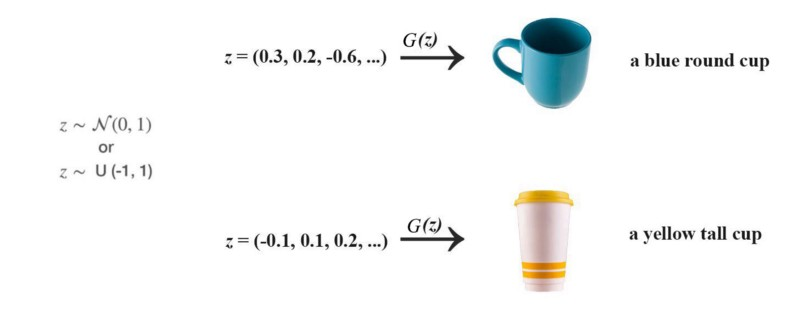

Conceptually, **z** represents the latent features of the images generated, for example, the color and the shape. In Deep learining classification, we don't control the features the model is learning. Similarly, in GAN, we don't control te semantic meaning of **z**. We let the training process to learn it.

To discover the meaning of *z*, the most effective way is to plot the generated images and examine ourselves. The following images are generated by progressive GAN using random noise *z*.

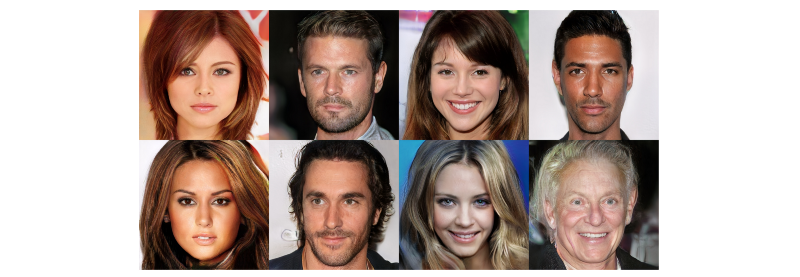

** So what is this magic generator G?**  
The following is the DCGAN which is one of the most popular designs for the generator network. It performs multiple transposed convolutions to upsample *z* to generate the image *x*. We can view it as the deep learning classifier in the reverse direction.

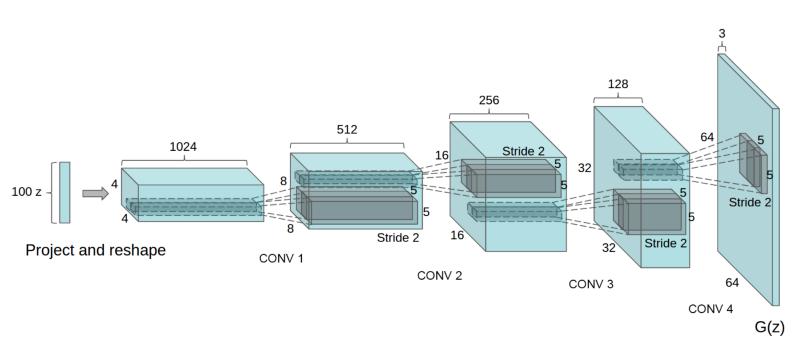

But a generator alone will just create random noise. Conceptually, the discriminator in GAN provides guidance to the generator on what images to create. Let's consider a GAN's application, CycleGAN, that uses a generator to convert real scenery into a Monet style painting.

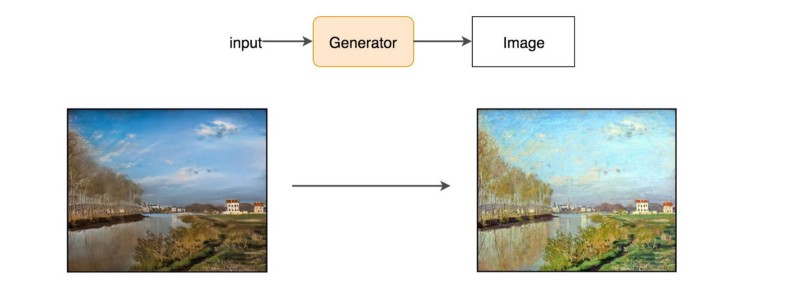

GAN builds a discriminator to learn what contributes as real images, and it provides feedback to the generator to create paintings that look like the real Monet paintings.

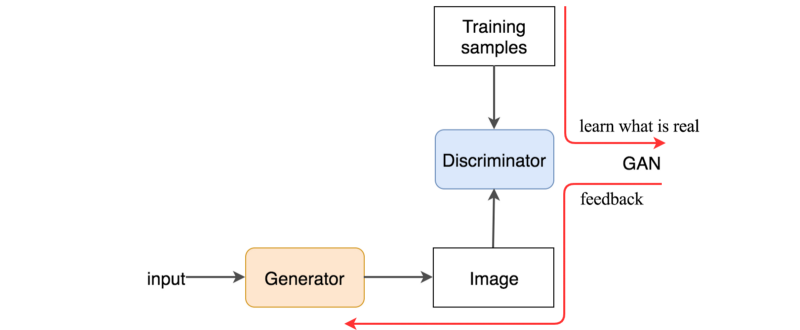

So how is it done technically? The discriminator looks at real images (training samples) and generated images separately. It distinguishes whether the input image to the discriminator is real or generated. The output *D(x)* is the probability that the input *x* is real, i.e. *P(class of input == real image)*.

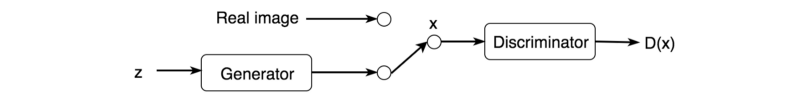

We train the discriminator just like a deep network classifier. If the input is real, we wand *D(x)=1*. If it is generated, it should be zero. Through this process, the discriminator identifies features that contribute to real images.

On the other hand, we want the generator to create images with *D(x)=1*. So we can train the generator by backpropagation this target value all the way back to the generator, i.r. we train the generator to create images that towards what the discriminator thinks it is real.

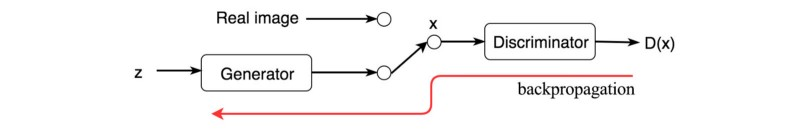

We train both networks in alternating steps and lock them into a fierce competition to improve themselves. Eventually, the discriminator identifies the tiny difference between the real and the generated, and the generator creates images that the discriminator cannot tell the diffirence. The GAN model eventually converges and produces natural look images.

This discriminator concept can be applied to many existing deep learning applications also. The discriminator in GAN acts as a critic. We can plug the discriminator into existing deep leaning solutions to provide feedback to make it better.

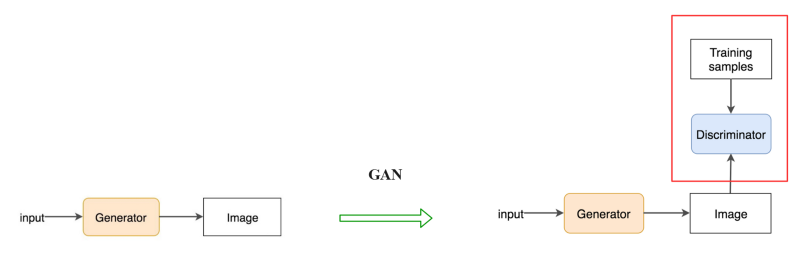

### Backpropagation

Now, we will go through some simple equations. The discriminator outputs a value **D(X)** indicating the change that **x** is a real image. Our objectivee is to mazimize the change to recognize real images as real and generated images as fake. i.e. the maximum likelihood of the observed data. To measure the loss, we use **cross-entropy** as in most Deep Learning: **p log(q)**. For real image, **p** (the true lavel for real images) equals to 1. For generated images, we reverse the label using (**1-label**). So the objective becomes (for discriminator):

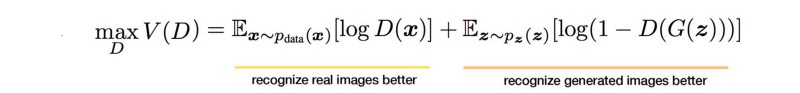

On the generator side, its objective function wants the model to generate images with the highest possible value of **D(x)** to fool the discriminator.

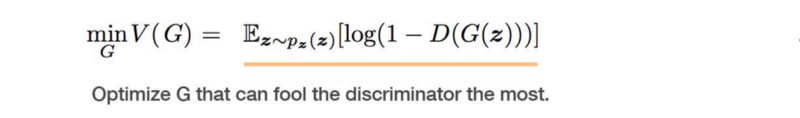

We often define GAN as minimax game which **G** wants to minimize **V** while **D** wants to mazimize it.

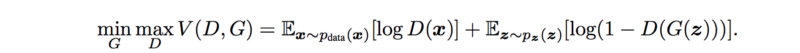

Once both objective functions are defined, they are learned jointly by the alternating gradient descent. We fix the generator model's parameters and perform a single iteration of gradient descent on the discriminator using the real and the generated images. Then we switch sides. Fix the disciminator and train the generator for another single iteration. We train both networks in alternating steps unitl the generator produces good quality images. The following summarizes the data flow and the gradients used for the packpropagation.

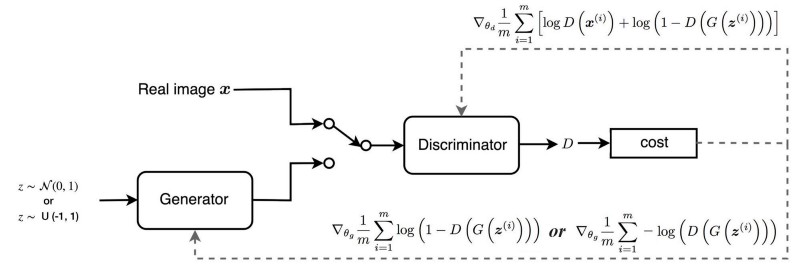

The pseudo code below puts everything together and shows how GAN is trained.

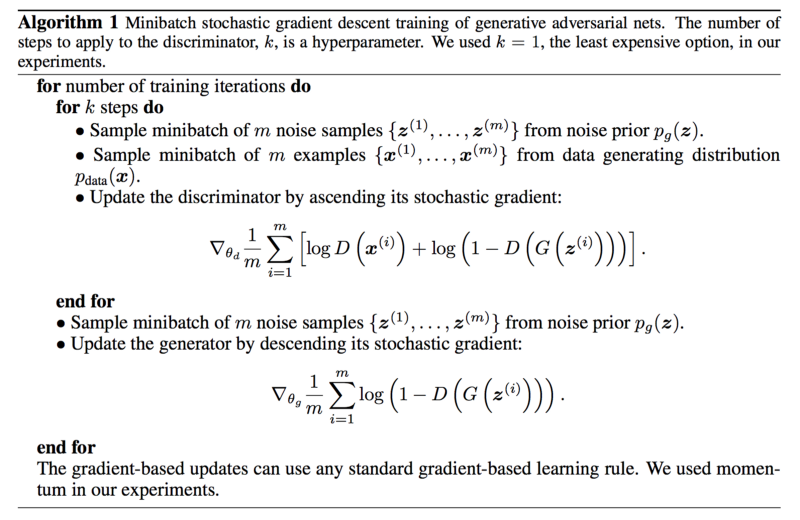